<a href="https://colab.research.google.com/github/stav1236/google-machine-learning-course/blob/main/foundational-courses/2.machine-learning-crash-course/ml-models/linear_regression/linear_regression_house_price_by_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the Dataset into Google Colab

In [3]:
# Install the needed modules
# !pip install pandas

# Import the needed modules
import pandas as pd

# URL for the raw CSV content
url = "https://raw.githubusercontent.com/stav1236/google-machine-learning-course/main/foundational-courses/2.machine-learning-crash-course/ml-models/linear_regression/datasets/House_Prices_Dataset.csv"

# Load dataset from GitHub
df = pd.read_csv(url)  # Correctly uses the raw content URL

# Display the first few rows
print(df)

     Size (Square Meters)  Price (Thousand USD)
0              143.635030            267.229555
1              287.678577            468.164421
2              232.998485            403.299707
3              199.664621            355.602789
4               89.004660            189.104895
..                    ...                   ...
995             72.895518            146.143052
996            279.328394            462.874900
997             84.204658            175.936619
998            287.559338            477.045985
999            161.501443            285.327955

[1000 rows x 2 columns]


2. Prepare the Data


In [5]:
import numpy as np

# Extract features (X) and target (Y)
X = df[['Size (Square Meters)']].values
y = df[['Price (Thousand USD)']].values

3. Display data

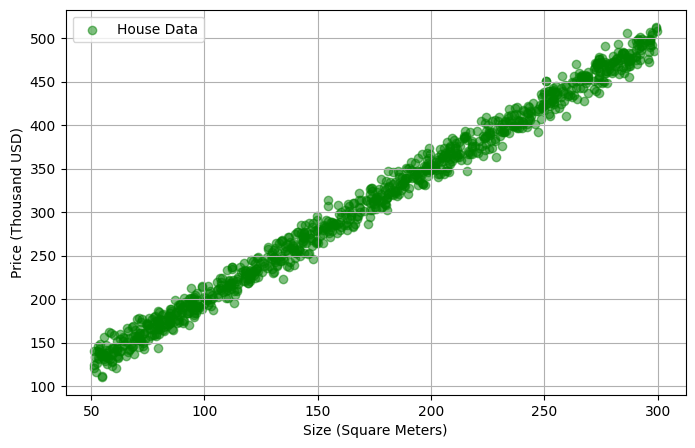

In [6]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, color='green', label="House Data")

# Labels and title
plt.xlabel("Size (Square Meters)")
plt.ylabel("Price (Thousand USD)")

# Grid and legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


4. Gradient Descent Loop

In [8]:
# Initialize parameters
m = 0  # Slope
b = 0  # Intercept
learning_rate = 0.000001  # Step size for updates (adjust as needed)
epochs = 100  # Number of iterations
n = len(X)  # Number of samples

# Store loss values for plotting
loss_history = []

# Gradient Descent Algorithm
for epoch in range(epochs):
    # Predictions using current m, b
    y_pred = m * X + b

    # Compute Mean Squared Error (Loss)
    loss = (1/n) * np.sum((y_pred - y) ** 2)
    loss_history.append(loss)

    # Compute gradients
    dm = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Final parameters
print(f"\nFinal Slope (m): {m}")
print(f"Final Intercept (b): {b}")

Epoch 0: Loss = 107986.0868
Epoch 9: Loss = 29495.1939
Epoch 19: Loss = 7267.0078
Epoch 29: Loss = 2084.4135
Epoch 39: Loss = 876.0685
Epoch 49: Loss = 594.3360
Epoch 59: Loss = 528.6470
Epoch 69: Loss = 513.3295
Epoch 79: Loss = 509.7562
Epoch 89: Loss = 508.9212
Epoch 99: Loss = 508.7246

Final Slope (m): 1.7484353170365026
Final Intercept (b): 0.010174248062630386


5. Plot Loss Over Time

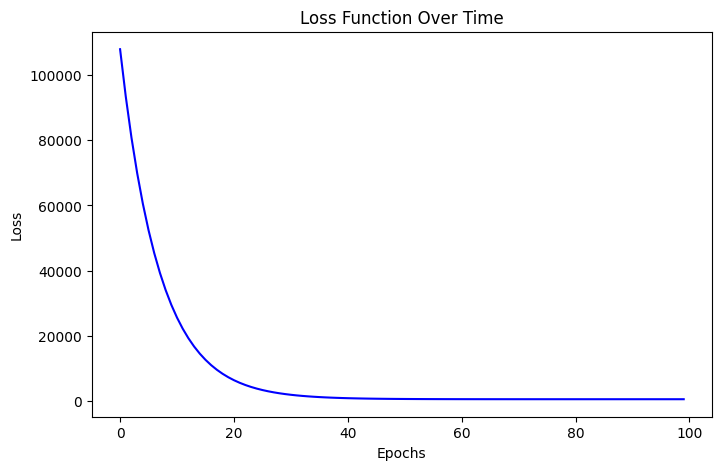

In [9]:
# Plot Loss Over Time
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Over Time")
plt.show()


6. Plot Regression Line

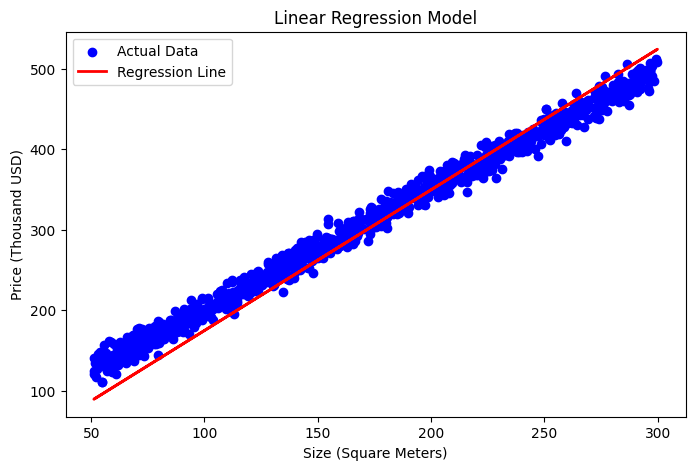

In [10]:
# Plot Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, m * X + b, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Size (Square Meters)")
plt.ylabel("Price (Thousand USD)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()